#Uploading Data and Libraries

In [1]:
!pip install pandas
import numpy as np                 # For numerical operations
import scipy.stats as stats        # For statistical tools and distributions
import pandas as pd                # For data manipulation
import matplotlib.pyplot as plt    # For basic plotting
import seaborn as sns              # For advanced visualization

# Optional: Settings for better control over plots
plt.style.use('seaborn-darkgrid')  # Set a style for the plots
sns.set_context('talk')            # Set context to "talk" for legible plots in presentations


<ipython-input-1-dc6417411148>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Set a style for the plots


In [4]:
from google.colab import files
import pandas as pd

# This will prompt you to select a file to upload
uploaded = files.upload()

# Assuming the file's name is "2023-2024 regular.xlsx"
import io
data = pd.read_excel(io.BytesIO(uploaded['2023-2024 regular.xlsx']))

Saving 2023-2024 regular.xlsx to 2023-2024 regular.xlsx


In [5]:
# Display the first few rows of the DataFrame to confirm successful upload and reading
print(data.head())

     G       Date   Tm  At?  Opp Result Margin  GS                   MP  FG  \
0  349 2024-04-14  LAL    @  NOP       W (+16)   1  1900-01-01 13:41:00  11   
1  348 2024-04-12  LAL    @  MEM        W (+3)   1  1900-01-01 16:54:00  13   
2  347 2024-04-09  LAL  NaN  GSW       L (-14)   1  1900-01-01 11:32:00  14   
3  346 2024-04-06  LAL  NaN  CLE       W (+19)   1  1900-01-01 11:54:00  10   
4  345 2024-04-03  LAL    @  WAS        W (+5)   1  1900-01-01 12:11:00   9   

   FGA  ...  AST  STL  BLK  TOV  PF  PTS  GmSc  Plus/Minus  Triple Double  \
0   20  ...   17    5    1    4   0   28  36.1        19.0              1   
1   20  ...    5    2    0    8   1   37  27.6        -3.0              0   
2   22  ...   11    2    0    4   0   33  31.0        -6.0              0   
3   18  ...   12    1    1    5   1   24  20.8        10.0              0   
4   18  ...    9    3    0    4   2   25  22.6         9.0              0   

   Win?  
0     1  
1     1  
2     0  
3     1  
4     1  

[

#Cleaning Data

In [ ]:
# Check for any missing values in the dataset
print(data.isnull().sum())

# Convert 'Date' to datetime format if not already
data['Date'] = pd.to_datetime(data['Date'])

# Ensure numeric columns like 'PTS', 'TRB', 'AST' are of type float or int
data['PTS'] = data['PTS'].astype(float)
data['TRB'] = data['TRB'].astype(float)
data['AST'] = data['AST'].astype(float)

# Verify data types
print(data.dtypes)


In [ ]:
# Check for any missing values in the dataset
print(data.isnull().sum())

# Convert 'Date' to datetime format if not already
data['Date'] = pd.to_datetime(data['Date'])

# Ensure numeric columns like 'PTS', 'TRB', 'AST' are of type float or int
data['PTS'] = data['PTS'].astype(float)
data['TRB'] = data['TRB'].astype(float)
data['AST'] = data['AST'].astype(float)

# Verify data types
print(data.dtypes)


In [ ]:
# Replace "@" with "Away" and fill missing values with "Home"
data['At?'] = data['At?'].replace('@', 'Away').fillna('Home')

# Confirm changes
print(data['At?'].value_counts())
print(data.isnull().sum())


In [ ]:
# Replace missing Plus/Minus value with 0
data['Plus/Minus'].fillna(0, inplace=True)

# Confirm the change
print(data['Plus/Minus'].isnull().sum())


In [11]:
# Fill FT% with 0 where FTA (Free Throw Attempts) is 0
data.loc[data['FTA'] == 0, 'FT%'] = 0

# Optionally, calculate FT% where FTA is not zero but FT% is missing (if any such cases exist)
data.loc[(data['FT%'].isnull()) & (data['FTA'] != 0), 'FT%'] = (data['FT'] / data['FTA']) * 100

# Check the results to confirm all necessary changes
print(data['FT%'].isnull().sum())


0


#First Analysis

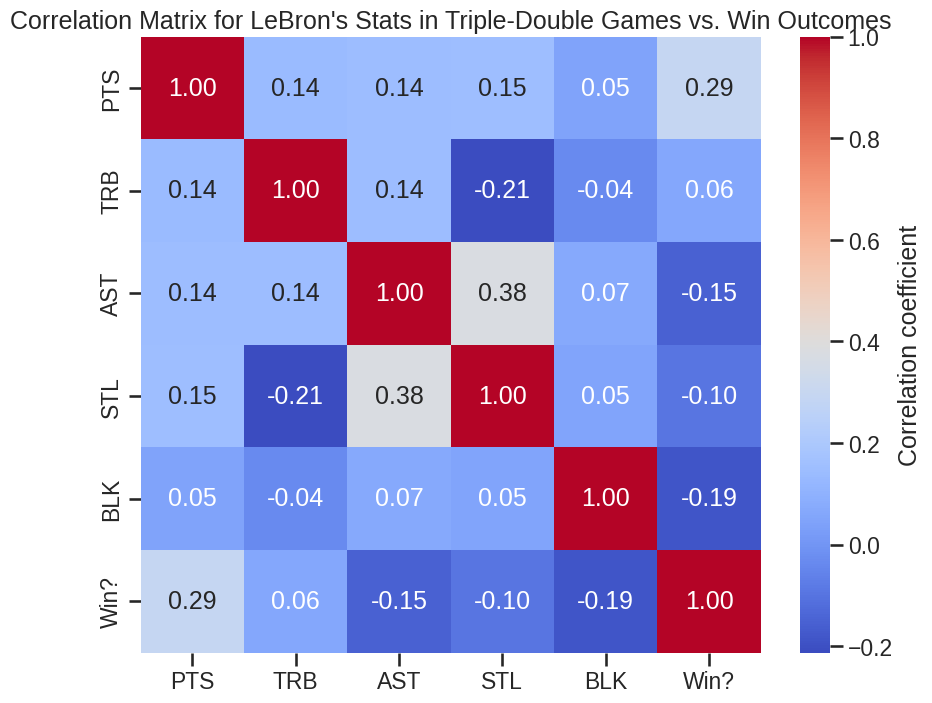

In [12]:
# Assuming the dataset is loaded and named `data`
# Filter the dataset for games where LeBron had a triple-double
triple_double_games = data[data['Triple Double'] == 1]

# Select columns relevant to the analysis
relevant_columns = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'Win?']  # Add other stats as needed
correlation_matrix = triple_double_games[relevant_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix for LeBron\'s Stats in Triple-Double Games vs. Win Outcomes')
plt.show()


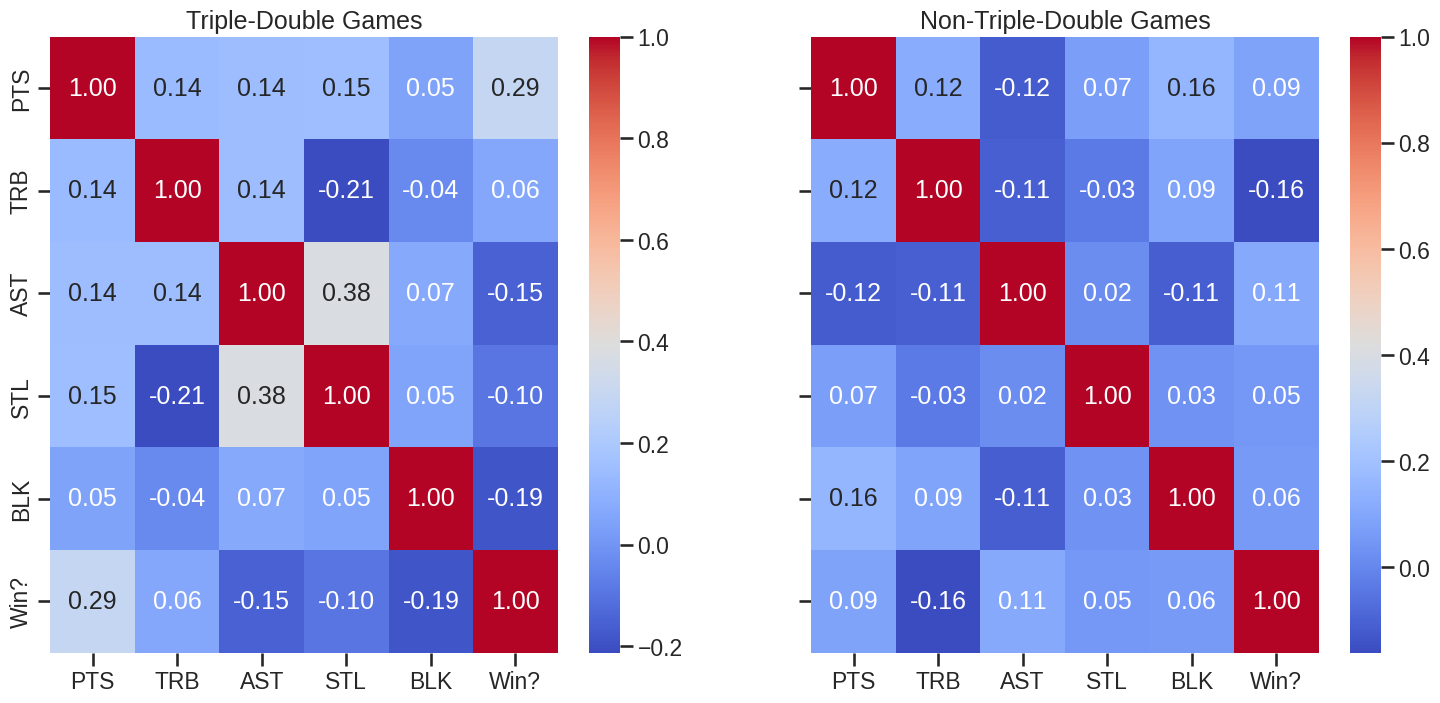

In [ ]:
# Filtering games without a triple-double
non_triple_double_games = data[data['Triple Double'] == 0]

# Computing correlation matrices
corr_td = triple_double_games[relevant_columns].corr()
corr_ntd = non_triple_double_games[relevant_columns].corr()

# Plotting both correlation matrices side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
sns.heatmap(corr_td, ax=ax[0], annot=True, fmt=".2f", cmap='coolwarm')
ax[0].set_title('Triple-Double Games')
sns.heatmap(corr_ntd, ax=ax[1], annot=True, fmt=".2f", cmap='coolwarm')
ax[1].set_title('Non-Triple-Double Games')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Example using sample data, make sure to replace 'your_dataframe' with your actual DataFrame name
# Assuming the dataset is loaded and named `data`
# And 'data' already contains the necessary preprocessed columns

# Filter the dataset for games where LeBron had a triple-double
triple_double_games = data[data['Triple Double'] == 1]

# Selecting predictors and the outcome variable
X = triple_double_games[['PTS', 'TRB', 'AST', 'STL', 'BLK']]  # Predictor variables
y = triple_double_games['Win?']  # Response variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.58      1.00      0.74         7

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12

Confusion Matrix:
 [[0 5]
 [0 7]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Initial Visualizations

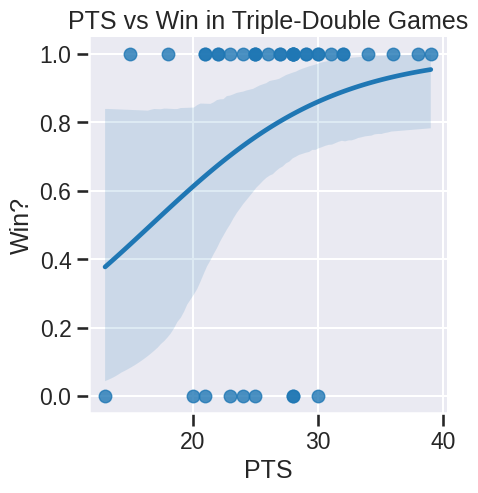

In [ ]:
import seaborn as sns

# Scatter plot for points vs. win in triple-double games
sns.lmplot(x='PTS', y='Win?', data=triple_double_games, logistic=True).set(title='PTS vs Win in Triple-Double Games')
plt.show()

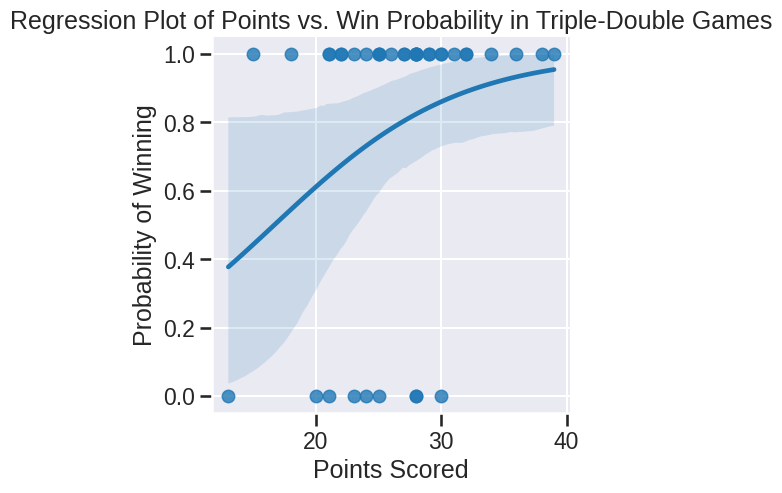

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regression plot for Points vs. Wins in triple-double games
sns.lmplot(x='PTS', y='Win?', data=triple_double_games, logistic=True, ci=95, palette='coolwarm')
plt.title('Regression Plot of Points vs. Win Probability in Triple-Double Games')
plt.xlabel('Points Scored')
plt.ylabel('Probability of Winning')
plt.show()


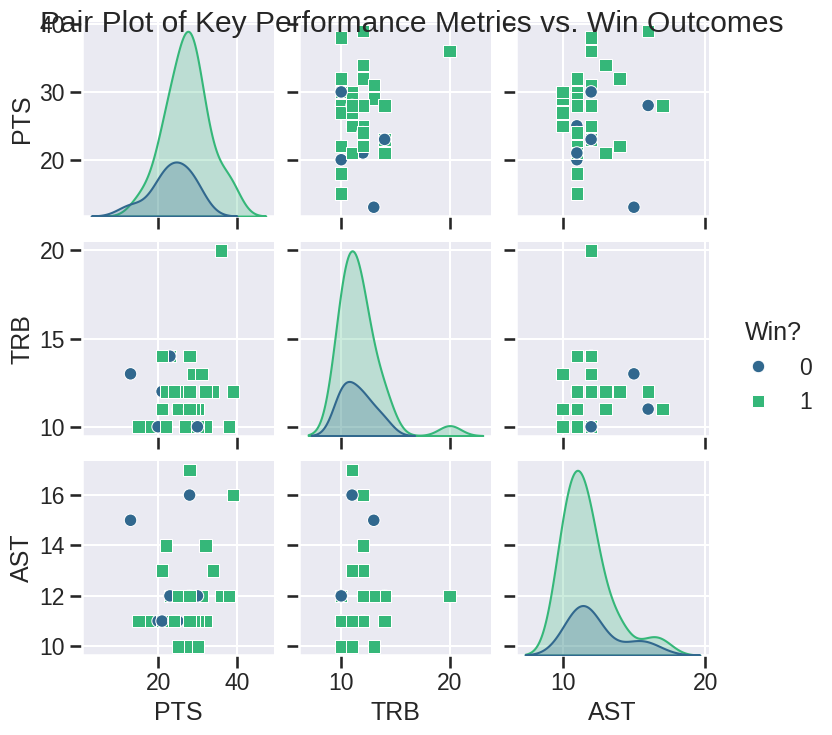

In [ ]:
# Selecting a subset of relevant metrics for the pair plot
metrics = ['PTS', 'TRB', 'AST', 'Win?']

# Pair plot with a hue based on Wins
sns.pairplot(triple_double_games[metrics], hue='Win?', palette='viridis', markers=["o", "s"])
plt.suptitle('Pair Plot of Key Performance Metrics vs. Win Outcomes', verticalalignment='top')
plt.show()


<ipython-input-18-9f75f8a3d771>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Win?', y='PTS', data=triple_double_games, inner='quartile', palette='coolwarm')


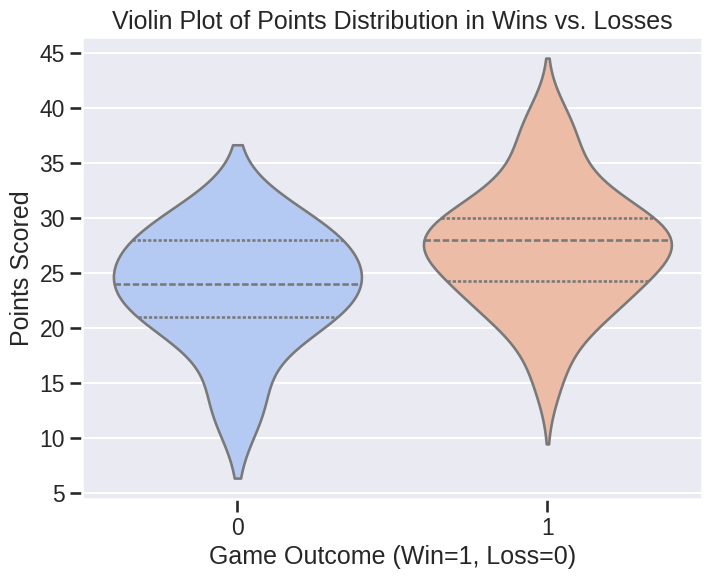

In [ ]:
# Violin plot for distribution of points in wins vs. losses
plt.figure(figsize=(8, 6))
sns.violinplot(x='Win?', y='PTS', data=triple_double_games, inner='quartile', palette='coolwarm')
plt.title('Violin Plot of Points Distribution in Wins vs. Losses')
plt.xlabel('Game Outcome (Win=1, Loss=0)')
plt.ylabel('Points Scored')
plt.show()


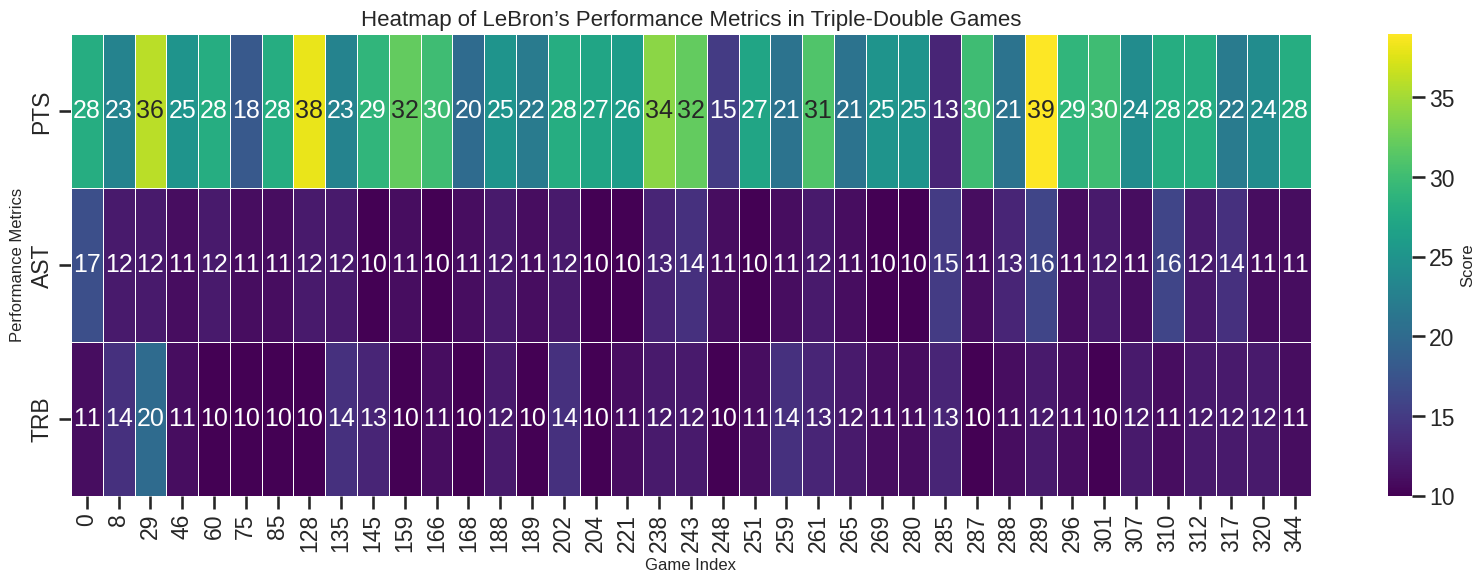

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming triple_double_games is already defined and contains the necessary data
# If you need to set this up, follow the data preparation steps described previously

# Selecting just the performance metrics and transposing for a better heatmap layout
performance_metrics = triple_double_games[['PTS', 'AST', 'TRB']].transpose()

# Creating a larger plot
plt.figure(figsize=(20, 6))  # Adjust the size to fit your dataset and preferences

# Creating the heatmap
ax = sns.heatmap(performance_metrics, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)

# Enhancing visuals
ax.set_title('Heatmap of LeBron’s Performance Metrics in Triple-Double Games', fontsize=16)
ax.set_xlabel('Game Index', fontsize=12)
ax.set_ylabel('Performance Metrics', fontsize=12)

# Improving the color bar
colorbar = ax.collections[0].colorbar
colorbar.set_label('Score', fontsize=12)

# Optionally rotate the x-axis labels if they overlap
plt.xticks(rotation=90)

plt.show()


#Effect of Points/Rebounds/Assists on Wins

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your data (this line is just a placeholder - make sure your DataFrame is loaded)
# data = pd.read_excel('path_to_your_file.xlsx')

# Splitting the data based on whether LeBron achieved a triple-double
triple_double_games = data[data['Triple Double'] == 1]
non_triple_double_games = data[data['Triple Double'] == 0]

# Calculating win rates
win_rate_td = triple_double_games['Win?'].mean()
win_rate_ntd = non_triple_double_games['Win?'].mean()

print(f"Win rate with triple-double: {win_rate_td:.2f}")
print(f"Win rate without triple-double: {win_rate_ntd:.2f}")

# Preparing data for chi-squared test
win_td = triple_double_games['Win?'].sum()
loss_td = len(triple_double_games) - win_td
win_ntd = non_triple_double_games['Win?'].sum()
loss_ntd = len(non_triple_double_games) - win_ntd

# Creating a contingency table
contingency_table = [[win_td, loss_td],
                     [win_ntd, loss_ntd]]

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Test result: chi2 = {chi2}, p-value = {p}")

# Interpret the results
if p < 0.05:
    print("Statistically significant difference in win rates.")
else:
    print("No statistically significant difference in win rates.")


Win rate with triple-double: 0.77
Win rate without triple-double: 0.56
Chi-squared Test result: chi2 = 5.34130103570192, p-value = 0.020825924351218626
Statistically significant difference in win rates.


#Logistic Regression Model

In [ ]:
!pip install statsmodels
import statsmodels.api as sm
# Selecting the independent variables and the dependent variable:
X = triple_double_games[['PTS', 'TRB', 'AST']]  # Predictor variables
y = triple_double_games['Win?']  # Binary outcome variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Create a logistic regression model
model = sm.Logit(y, X)

# Fit the model
result = model.fit()

# Display the results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.477516
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Win?   No. Observations:                   39
Model:                          Logit   Df Residuals:                       35
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 May 2024   Pseudo R-squ.:                  0.1160
Time:                        01:59:07   Log-Likelihood:                -18.623
converged:                       True   LL-Null:                       -21.068
Covariance Type:            nonrobust   LLR p-value:                    0.1801
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6525      4.340     -0.150      0.880      -9.159       7.854
PTS            0.1421      0.

#**Simulations**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming data is already loaded and the model coefficients are known
# Here are hypothetical means and standard deviations for LeBron's stats in triple-double games
mean_pts = triple_double_games['PTS'].mean()
std_pts = triple_double_games['PTS'].std()

mean_trb = triple_double_games['TRB'].mean()
std_trb = triple_double_games['TRB'].std()

mean_ast = triple_double_games['AST'].mean()
std_ast = triple_double_games['AST'].std()

# Coefficients from logistic regression
intercept = -0.6525
coef_pts = 0.1421
coef_trb = 0.1243
coef_ast = -0.2682

# Function to simulate one game
def simulate_game():
    pts = np.random.normal(mean_pts, std_pts)
    trb = np.random.normal(mean_trb, std_trb)
    ast = np.random.normal(mean_ast, std_ast)

    # Calculating the log-odds of winning
    log_odds_win = intercept + coef_pts * pts + coef_trb * trb + coef_ast * ast
    # Converting log-odds to probability using the logistic function
    probability_win = 1 / (1 + np.exp(-log_odds_win))
    return probability_win

# Running the simulation for 10,000 games
simulations = 10000
results = [simulate_game() for _ in range(simulations)]

# Calculating the average win probability
average_win_probability = np.mean(results)
print(f"Estimated Probability of Winning: {average_win_probability:.2f}")


Estimated Probability of Winning: 0.76


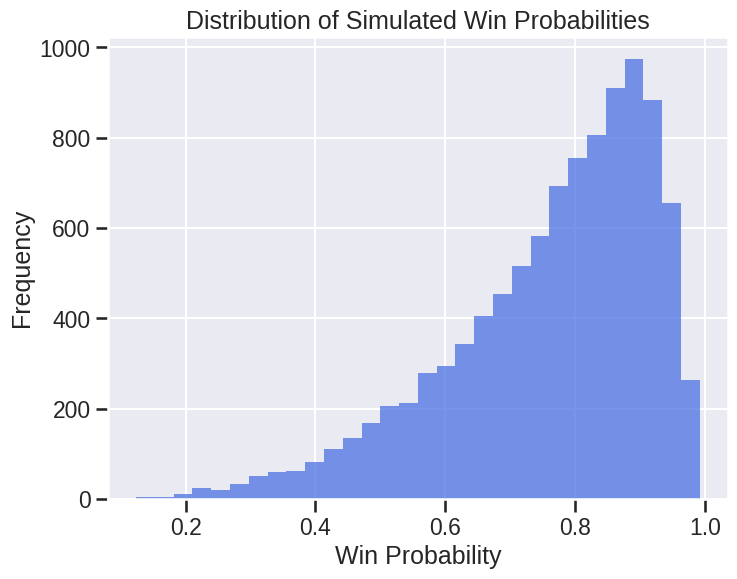

In [ ]:
# Assuming 'results' contains the list of win probabilities from the Monte Carlo simulation
plt.figure(figsize=(8, 6))
plt.hist(results, bins=30, color='royalblue', alpha=0.7)
plt.title('Distribution of Simulated Win Probabilities')
plt.xlabel('Win Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


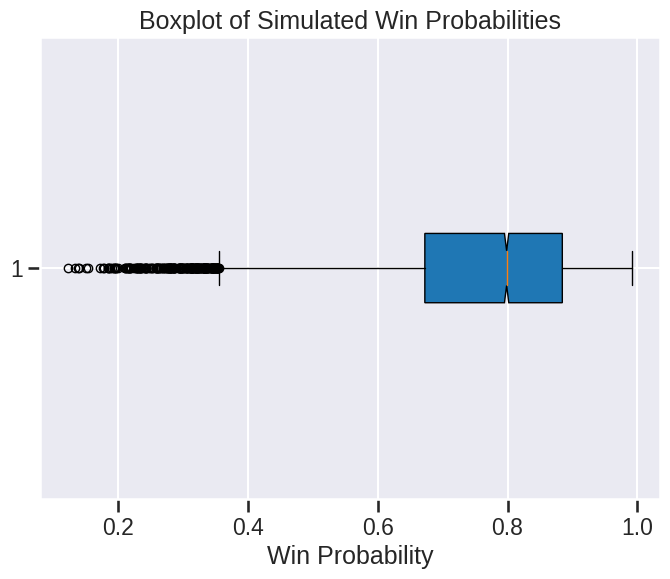

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(results, vert=False, patch_artist=True, notch=True)
plt.title('Boxplot of Simulated Win Probabilities')
plt.xlabel('Win Probability')
plt.grid(True)
plt.show()


#Simulation of Home vs. Away

In [ ]:
# Assuming 'data' is your DataFrame and contains an 'At?' column where 'Home' or 'Away' is specified
home_games = data[(data['Triple Double'] == 1) & (data['At?'] == 'Home')]
away_games = data[(data['Triple Double'] == 1) & (data['At?'] == 'Away')]


In [ ]:
def simulate_games(games_df, num_simulations=10000):
    results = []
    for _ in range(num_simulations):
        pts = np.random.normal(games_df['PTS'].mean(), games_df['PTS'].std())
        trb = np.random.normal(games_df['TRB'].mean(), games_df['TRB'].std())
        ast = np.random.normal(games_df['AST'].mean(), games_df['AST'].std())

        log_odds_win = intercept + coef_pts * pts + coef_trb * trb + coef_ast * ast
        probability_win = 1 / (1 + np.exp(-log_odds_win))
        results.append(probability_win)
    return results


In [ ]:
home_results = simulate_games(home_games)
away_results = simulate_games(away_games)


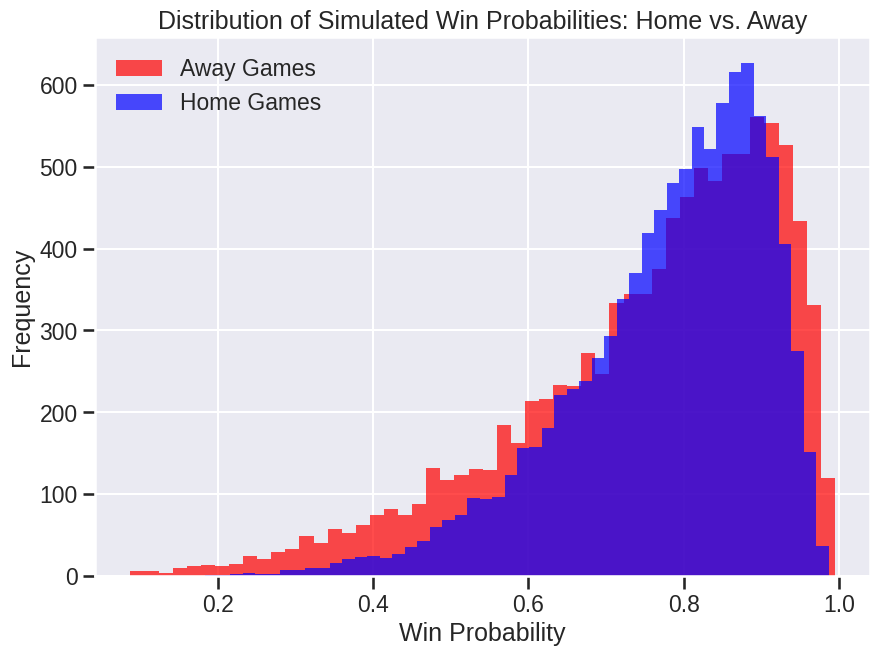

Average Win Probability at Home: 0.78
Average Win Probability Away: 0.75


In [ ]:
import matplotlib.pyplot as plt

# Calculating average probabilities
avg_win_prob_home = np.mean(home_results)
avg_win_prob_away = np.mean(away_results)

# Assuming 'home_results' and 'away_results' are lists containing the win probabilities from the simulation
plt.figure(figsize=(10, 7))
plt.hist(away_results, bins=50, alpha=0.7, color='red', label='Away Games')
plt.hist(home_results, bins=50, alpha=0.7, color='blue', label='Home Games')
plt.title('Distribution of Simulated Win Probabilities: Home vs. Away')
plt.xlabel('Win Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Output average results
print(f"Average Win Probability at Home: {avg_win_prob_home:.2f}")
print(f"Average Win Probability Away: {avg_win_prob_away:.2f}")


#(Simulation with) Conferences

In [ ]:
team_to_conference = {
    'ATL': 'Eastern', 'BOS': 'Eastern', 'BKN': 'Eastern', 'CHA': 'Eastern', 'CHI': 'Eastern',
    'CLE': 'Eastern', 'DET': 'Eastern', 'IND': 'Eastern', 'MIA': 'Eastern', 'MIL': 'Eastern',
    'NYK': 'Eastern', 'ORL': 'Eastern', 'PHI': 'Eastern', 'TOR': 'Eastern', 'WAS': 'Eastern',
    'DAL': 'Western', 'DEN': 'Western', 'GSW': 'Western', 'HOU': 'Western', 'LAC': 'Western',
    'LAL': 'Western', 'MEM': 'Western', 'MIN': 'Western', 'NOP': 'Western', 'OKC': 'Western',
    'PHX': 'Western', 'POR': 'Western', 'SAC': 'Western', 'SAS': 'Western', 'UTA': 'Western'
}


In [ ]:
# Assuming 'data' is your DataFrame and 'Opp' is the column with team abbreviations
data['Conference'] = data['Opp'].map(team_to_conference)


In [ ]:
def simulate_games(games_df, num_simulations=10000):
    results = []
    intercept = -0.6525  # From your previous regression results
    coef_pts = 0.1421    # Coefficient for points
    coef_trb = 0.1243    # Coefficient for rebounds
    coef_ast = -0.2682   # Coefficient for assists

    for _ in range(num_simulations):
        pts = np.random.normal(games_df['PTS'].mean(), games_df['PTS'].std())
        trb = np.random.normal(games_df['TRB'].mean(), games_df['TRB'].std())
        ast = np.random.normal(games_df['AST'].mean(), games_df['AST'].std())

        log_odds_win = intercept + coef_pts * pts + coef_trb * trb + coef_ast * ast
        probability_win = 1 / (1 + np.exp(-log_odds_win))
        results.append(probability_win)
    return np.mean(results)

# Filter the games by conference
eastern_games = data[(data['Triple Double'] == 1) & (data['Conference'] == 'Eastern')]
western_games = data[(data['Triple Double'] == 1) & (data['Conference'] == 'Western')]

# Run simulations
eastern_win_prob = simulate_games(eastern_games)
western_win_prob = simulate_games(western_games)

print(f"Estimated Probability of Winning against Eastern Conference teams: {eastern_win_prob:.2f}")
print(f"Estimated Probability of Winning against Western Conference teams: {western_win_prob:.2f}")


Estimated Probability of Winning against Eastern Conference teams: 0.77
Estimated Probability of Winning against Western Conference teams: 0.75


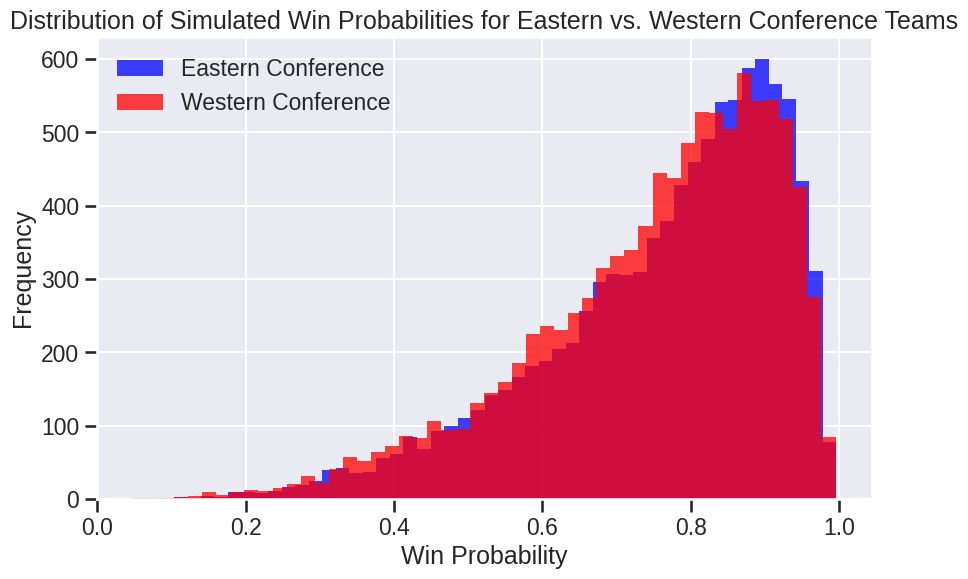

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_games(games_df, num_simulations=10000):
    results = []
    intercept = -0.6525  # Use your model's intercept
    coef_pts = 0.1421    # Coefficient for points
    coef_trb = 0.1243    # Coefficient for rebounds
    coef_ast = -0.2682   # Coefficient for assists

    for _ in range(num_simulations):
        pts = np.random.normal(games_df['PTS'].mean(), games_df['PTS'].std())
        trb = np.random.normal(games_df['TRB'].mean(), games_df['TRB'].std())
        ast = np.random.normal(games_df['AST'].mean(), games_df['AST'].std())

        log_odds_win = intercept + coef_pts * pts + coef_trb * trb + coef_ast * ast
        probability_win = 1 / (1 + np.exp(-log_odds_win))
        results.append(probability_win)
    return results

# Assuming 'eastern_games' and 'western_games' are already filtered DataFrames
eastern_results = simulate_games(eastern_games)
western_results = simulate_games(western_games)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.hist(eastern_results, bins=50, alpha=0.75, label='Eastern Conference', color='blue')
plt.hist(western_results, bins=50, alpha=0.75, label='Western Conference', color='red')
plt.title('Distribution of Simulated Win Probabilities for Eastern vs. Western Conference Teams')
plt.xlabel('Win Probability')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


#Differences in Points/Rebounds/Assists (Simulation)

In [ ]:
def simulate_impact(metric_name, fluctuation_range, baseline_metrics):
    win_probs = []
    metric_values = []

    for change in fluctuation_range:
        new_metrics = baseline_metrics.copy()
        new_metrics[metric_name] += change
        pts, trb, ast = new_metrics['PTS'], new_metrics['TRB'], new_metrics['AST']

        log_odds_win = intercept + coef_pts * pts + coef_trb * trb + coef_ast * ast
        probability_win = 1 / (1 + np.exp(-log_odds_win))

        win_probs.append(probability_win)
        metric_values.append(pts if metric_name == 'PTS' else trb if metric_name == 'TRB' else ast)

    return metric_values, win_probs


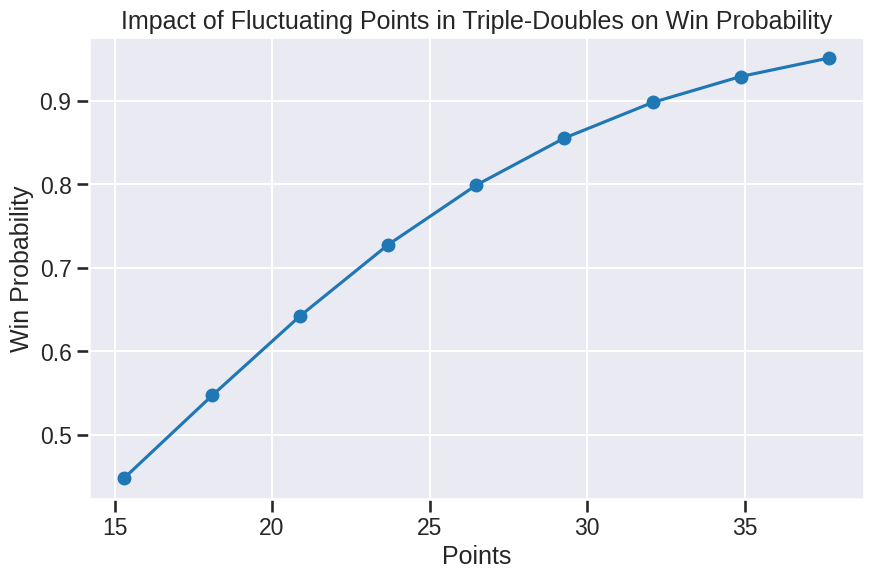

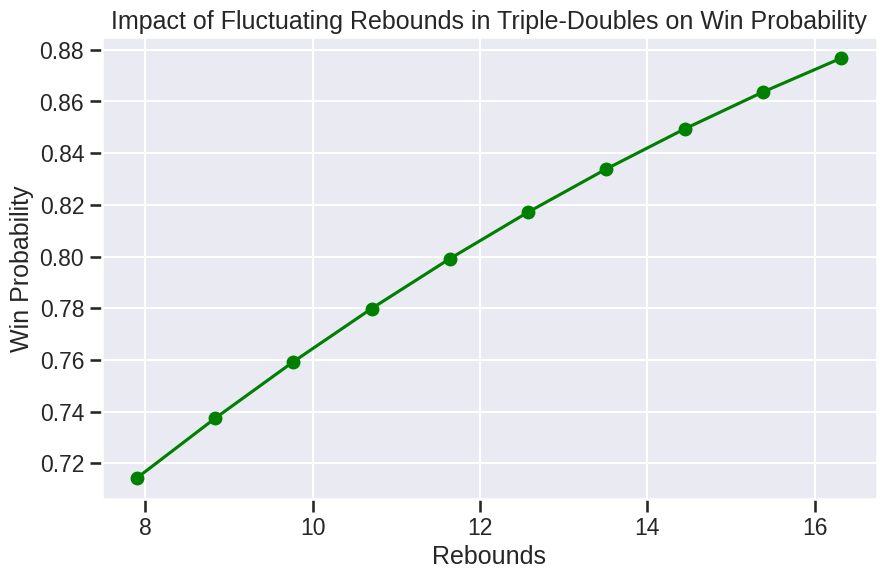

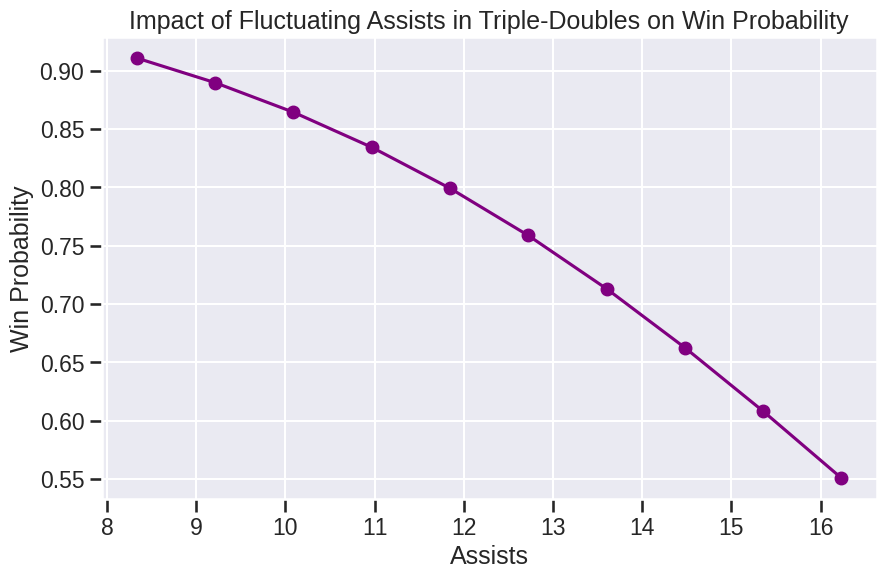

In [ ]:
# Utilizing the same baseline and simulation function
baseline_metrics = {
    'PTS': triple_double_games['PTS'].mean(),
    'TRB': triple_double_games['TRB'].mean(),
    'AST': triple_double_games['AST'].mean()
}

# Defining the fluctuation ranges based on standard deviations
std_trb = triple_double_games['TRB'].std()
std_ast = triple_double_games['AST'].std()
fluctuation_range_trb = np.arange(-2 * std_trb, 2 * std_trb + 1, std_trb / 2)
fluctuation_range_ast = np.arange(-2 * std_ast, 2 * std_ast + 1, std_ast / 2)

# Simulating impact for rebounds
trb_values, trb_probs = simulate_impact('TRB', fluctuation_range_trb, baseline_metrics)

# Simulating impact for assists
ast_values, ast_probs = simulate_impact('AST', fluctuation_range_ast, baseline_metrics)

# Range for fluctuations (e.g., +/- 2 standard deviations in steps of 0.5 standard deviation)
std_pts = triple_double_games['PTS'].std()
fluctuation_range_pts = np.arange(-2 * std_pts, 2 * std_pts + 1, std_pts / 2)

pts_values, pts_probs = simulate_impact('PTS', fluctuation_range_pts, baseline_metrics)

# Plotting the results for points fluctuation
plt.figure(figsize=(10, 6))
plt.plot(pts_values, pts_probs, marker='o')
plt.title('Impact of Fluctuating Points in Triple-Doubles on Win Probability')
plt.xlabel('Points')
plt.ylabel('Win Probability')
plt.grid(True)
plt.show()

# Plotting the results for rebounds
plt.figure(figsize=(10, 6))
plt.plot(trb_values, trb_probs, marker='o', color='green')
plt.title('Impact of Fluctuating Rebounds in Triple-Doubles on Win Probability')
plt.xlabel('Rebounds')
plt.ylabel('Win Probability')
plt.grid(True)
plt.show()

# Plotting the results for assists
plt.figure(figsize=(10, 6))
plt.plot(ast_values, ast_probs, marker='o', color='purple')
plt.title('Impact of Fluctuating Assists in Triple-Doubles on Win Probability')
plt.xlabel('Assists')
plt.ylabel('Win Probability')
plt.grid(True)
plt.show()
